# Homework 4.4.2 Graph Representations
- Name: Congxin (David) Xu
- Computing ID: cx2rx

### Question 1: Adjacency Matrix
(15 pts) Where the entry at row i and column j specifies whether there is an edge from i to j (with the weight or extra data on that edge). Argue about the time complexity (in $\Theta$ notations) of Get, Add, and AllFrom in this representation.

**Answer**:

1. The time complexity of `Get` is $\Theta(1)$ because accessing the extra data on this edge is same as accessing the value of a 2-D array by indexes, $i$ and $j$, which takes $\Theta(1)$
2. The time complexity of `Add` is $\Theta(1)$ because similar to `Get`, we just use the indexes $i$ and $j$ to find that edge and assign it with extra data $w$.
3. The time complexity of `AllFrom` is $\Theta(n)$ because we need to loop through every node on the vertice $V$.

### Question 2: Adjacency List
(15 pts) For each i associates a list of nodes j (with extra data) such that there is an edge from i to j. Argue about the time complexity (in  $\Theta$ notations) of Get, Add, and AllFrom in this representation.


**Answer**:

1. The time complexity of `Get` is $\Theta(n)$ because we may need to check each node j, associated with $i$.
2. The time complexity of `Add` is $\Theta(1)$ because we can just add an edge at the end of the linked list. 
3. The time complexity of `AllFrom` is $\Theta(1)$ because it can just return the entire linked list at $i$.

### Question 3:  Edge List
(15 pts) Each edge (i; j) associates a list of nodes j (with extra data) such that there is an edge from i to j. Argue about the time complexity (in $\Theta$  notations) of Get, Add, and AllFrom in this representation.

**Answer**:

1. The time complexity of `Get` is $\Theta(m)$ because we may need to check each node j, associated with $i$.
2. The time complexity of `Add` is $\Theta(1)$ because we can just add an edge at the end of the Edge list. 
3. The time complexity of `AllFrom` is $\Theta(m)$ because we need to loop through every node associated with $i$.

### Question 4
(20 pts) There are a lot of network data libraries on web. See for example Konect that hosts a large array of networks with different types. Choose two undirected graphs, I suggest one small (n < 1000) if you want to visualize it and one large (arbitrary) and read them using your code. Write a python script that can read the chosen network data then cast the data into a Graph class using NetworkX or igraph, two useful python libraries to build your graph object (and visualize them if you want).
Based on your search on network libraries, what is the common way of storing network data? Why? Discuss the trade-offs of using the above mentioned representations in sparse and dense graphs.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kunegis/konect-extr/master/extr/pholme/hiv.csv", 
                   sep = " ", 
                   skiprows=1,
                   header=None)
data.columns = ('i', 'j')
data.head()

,i,j
0,0,1
1,0,2
2,0,3
3,0,4
4,0,6


In [3]:
data.shape

(41, 2)

#### Small Network

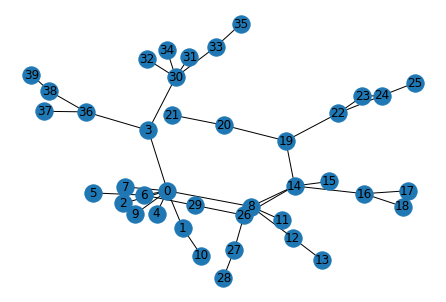

In [4]:
# Initialize a Graph
g = nx.Graph()

# Draw the Edge list
for row in range(0, len(data)):
    g.add_edge(data.iloc[row, 0], data.iloc[row, 1])
    
nx.draw(g, with_labels=True)

#### Larget Network

In [5]:
data2 = pd.read_csv('out.edit-sawikibooks', 
                    sep = "\t", 
                    skiprows=1, 
                    header=None)

data2.columns = ('i', 'j', 'weight','timestamp')
data2.head()

,i,j,weight,timestamp
0,1,1,1,1151439209
1,2,1,1,1154383173
2,3,1,1,1211294981
3,4,1,1,1211932406
4,4,1,1,1211934511


In [6]:
data2.shape

(1956, 4)

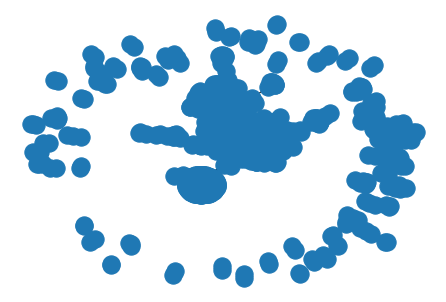

In [7]:
# Initialize a Graph
g = nx.Graph()

# Draw the Edge list
for row in range(0, len(data2)):
    g.add_edge(data2.iloc[row, 0], data2.iloc[row, 1])
    
nx.draw(g)

It looks like that the most common way to store a network is to use `Edge List`. I think this is most efficient way for the people and computers to read and visualize the network. 
- For sparse graphs, I think the `Edge List` is a good way to store the network comparing to `Adjacency List` and `Adjacency Matrix`, because it will take relatively small amount of memory space. 
- For a dense graphs, I think `Adjacency List` and `Adjacency Matrix` will take less memory space comparing to the `Edge List`.

### Question 5
- Read an adjacency list/matrix representation of graph and convert it into a DiGraph object in networkx from the Konect websie.
- (30 points) Implement DFS and perform it on `G` from an arbitrary node `s` and allow users to make queries on the reachability from `s` to anywhere in `G`. You can return two list/arrays from your DFS(G, s) calls:
    - visited: is a list with n (number of nodes) elements (Boolean type).
    - EdgeTo: a list with of edges that represents the edges traversed in the originial graph and forms the edges of your DFS tree.
    - Hint: Use of Stack is recommended.

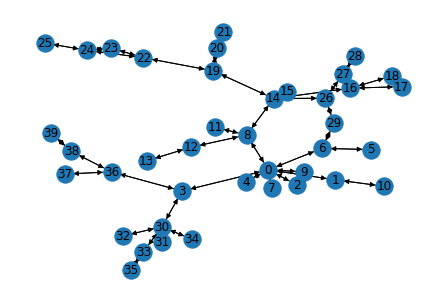

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/kunegis/konect-extr/master/extr/pholme/hiv.csv", 
                   sep = " ", 
                   skiprows=1,
                   header=None)

# Initialize a Graph
g = nx.Graph()

# Draw the Edge list
for row in range(0, len(data)):
    g.add_edge(data.iloc[row, 0], data.iloc[row, 1])

# Convert this to a directed graph
graph = nx.DiGraph(g)

# Draw 
nx.draw(graph, with_labels=True)

In [9]:
def DFS(G, s):
    '''
    input: G, is a DiGraph object
    s: string, is a node
    '''
    
    # Create a set to store the nodes discovered
    discovered = set()
    # Create a stack list
    stack = []
    # Append the initial node
    stack.append(s)
    # Create an EdgeTo list
    EdgeTo = []
    
    # Looping through the stack
    while (len(stack) != 0):
        # Pop out the last item in the stack list
        s = stack.pop()
        # If we have not visited this node before
        if s not in discovered: 
            # Add this node to the discovered set
            discovered.add(s)
            # Go to every neighbors of node s
            for edges in G.neighbors(s):
                # Add all the neighbors to stack
                stack.append(edges)
                # Record the EdgeTo
                EdgeTo += [[s, edges]]
                
    # Check if which nodes have been visited
    visited = []
    for i in graph.nodes:
        if i in discovered:
            visited += [True]
        else:
            visited += [False]
    
    return(visited, EdgeTo)

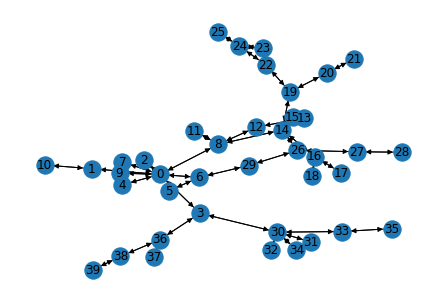

In [10]:
# Running DFS
v,et = DFS(graph, 1)

# Initialize a Graph
newg = nx.Graph()

# Draw the Edge list
for row in range(0, len(et)):
    newg.add_edge(et[row][0], et[row][1])

# Convert this to a directed graph
newgraph = nx.DiGraph(newg)

# Draw 
nx.draw(newgraph, with_labels=True)